<a href="https://colab.research.google.com/github/Temmy-bit/CC-Fraud-Detection/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
import cv2 as cv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2, ResNet50

In [ ]:
data = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
(train_images, train_labels), (test_images,test_labels) = data

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
# model = keras.Sequential([
#                         keras.layers.Flatten(input_shape=(28,28)),
#                         keras.layers.Dense(128,activation='relu'),
#                         keras.layers.Dense(10,activation='softmax')
# ])
# model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(train_images,train_labels,epochs =10)

In [ ]:
# test_loss,test_auc=model.evaluate(test_images,test_labels)

In [ ]:
# tf.as_dataframe(
#     train_images: tf.data.Dataset,
#     train_images: Optional[tf.core.DatasetInfo] = None
# ) -> StyledDataFrame

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv')

In [ ]:
# df.shape

In [ ]:
372450-73967

298483

In [ ]:
def load_az_dataset(datasetPath):
    # List for storing data
    data = []
  
    # List for storing labels
    labels = []
  
    for row in open(datasetPath): #Openfile and start reading each row
    #Split the row at every comma
        row = row.split(",")
    
        #row[0] contains label
        label = int(row[0])
    
        #Other all collumns contains pixel values make a saperate array for that
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        
        #Reshaping image to 28 x 28 pixels
        image = image.reshape((28, 28))
        
        #append image to data
        data.append(image)
        
        #append label to labels
        labels.append(label)
    
    #Converting data to numpy array of type float32
    data = np.array(data, dtype='float32')
  
    #Converting labels to type int
    labels = np.array(labels, dtype="int")
    
    return (data, labels)

In [ ]:
az_data, az_labels = load_az_dataset("/content/drive/MyDrive/A_Z Handwritten Data.csv")

In [ ]:
# df.iloc[:,784].isnull().sum()

In [ ]:
az_labels.shape

(372451,)

In [ ]:
# df.shape

In [ ]:
# x = df.loc[70000][1:].values
# x = x.reshape((28, 28))
# plt.imshow(x, cmap='binary')
# plt.show()

In [ ]:
# load data from tensorflow framework
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Stack train data and test data to form single array 
mnist_data = np.vstack([x_train, x_test])

# Horizontal stacking labels of train and test set
mnist_labels = np.hstack([y_train, y_test])

In [ ]:
az_data.shape

(372451, 28, 28)

In [ ]:
az_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
az_data.shape

(372451, 28, 28)

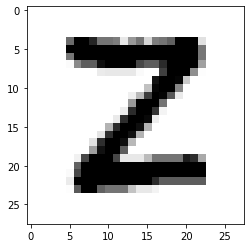

In [ ]:
x = az_data[372450][0:]
x = x.reshape((28, 28))
plt.imshow(x, cmap='gist_yarg')
plt.show()

In [ ]:
mnist_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
az_labels

array([ 0,  0,  0, ..., 25, 25, 25])

In [ ]:
z = np.hstack([az_labels, mnist_labels])

In [ ]:
z

array([0, 0, 0, ..., 4, 5, 6])

In [ ]:
# the MNIST dataset occupies the labels 0-9, so let's add 10 to every A-Z label to ensure the A-Z characters are not incorrectly labeled 

az_labels += 10

# stack the A-Z data and labels with the MNIST digits data and labels

data = np.vstack([az_data, mnist_data])
labels = np.hstack([az_labels, mnist_labels])

# Each image in the A-Z and MNIST digts datasets are 28x28 pixels;
# However, the architecture we're using is designed for 32x32 images,
# So we need to resize them to 32x32

data = [cv.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")

# add a channel dimension to every image in the dataset and scale the
# pixel intensities of the images from [0, 255] down to [0, 1]

data = np.expand_dims(data, axis=-1)
data /= 255.0

In [ ]:
data.shape

(442451, 32, 32, 1)

In [ ]:
az_labels

array([10, 10, 10, ..., 35, 35, 35])

In [ ]:
labels

array([10, 10, 10, ...,  4,  5,  6])

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

counts = labels.sum(axis=0)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = {}

# loop over all classes and calculate the class weight
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [ ]:
classWeight

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169069935111752,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
classTotals

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13870,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classTotals.max() / classTotals[i]

9.51695194206715

In [ ]:
classTotals.max()/10859

5.3250759738465785

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainX.shape

(353960, 32, 32, 1)

In [ ]:
testX.shape

(88491, 32, 32, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.05,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
fill_mode="nearest")

In [ ]:
batch_size = 128
epochs = 10

In [ ]:
enet = ResNet50(
        input_shape=(32, 32, 1),
        weights=None,
        include_top=False
    )

model = tf.keras.Sequential([
        enet,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(36, activation='softmax')
    ])
# model = keras.Sequential([
#                         keras.layers.Flatten(input_shape=(28,28)),
#                         keras.layers.Dense(128,activation='relu'),
#                         keras.layers.Dense(10,activation='softmax')
# ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(trainX,trainY,epochs =10)
H = model.fit(trainX,trainY,epochs=10)
test_loss,test_auc=model.evaluate(testX,testY)

Epoch 1/10
11062/11062 [==============================] - 455s 40ms/step - loss: 0.5240 - accuracy: 0.8758
Epoch 2/10
11062/11062 [==============================] - 440s 40ms/step - loss: 0.1910 - accuracy: 0.9491
Epoch 3/10
11062/11062 [==============================] - 439s 40ms/step - loss: 0.1243 - accuracy: 0.9657
Epoch 4/10
11062/11062 [==============================] - 439s 40ms/step - loss: 0.1010 - accuracy: 0.9721
Epoch 5/10
11062/11062 [==============================] - 438s 40ms/step - loss: 0.0859 - accuracy: 0.9763
Epoch 6/10
11062/11062 [==============================] - 440s 40ms/step - loss: 0.0777 - accuracy: 0.9786
Epoch 7/10
11062/11062 [==============================] - 440s 40ms/step - loss: 0.0693 - accuracy: 0.9808
Epoch 8/10
11062/11062 [==============================] - 438s 40ms/step - loss: 0.0640 - accuracy: 0.9821
Epoch 9/10
 1615/11062 [===>..........................] - ETA: 6:12 - loss: 0.0581 - accuracy: 0.9841

In [ ]:
from keras.models import load_model
model.save("network.h5")
loaded_mode = load_model("network.h5")
# loss, accuracy = loaded_model.evaluate(testX,testY)

In [ ]:
test_loss,test_auc=model.evaluate(testX,testY)

In [ ]:
model.predict(testX)

In [ ]:
from sklearn.metrics import classification_report
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, 128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

In [ ]:
from imutils import build_montages
# initialize our list of output test images
images = []
# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
	# classify the character
	probs = model.predict(testX[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
	# extract the image from the test data and initialize the text
	# label color as green (correct)
	image = (testX[i] * 255).astype("uint8")
	color = (0, 255, 0)
	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(testY[i]):
		color = (0, 0, 255)
	# merge the channels into one image, resize the image from 32x32
	# to 96x96 so we can better see it and then draw the predicted
	# label on the image
	image = cv.merge([image] * 3)
	image = cv.resize(image, (96, 96), interpolation=cv.INTER_LINEAR)
	cv.putText(image, label, (5, 20), cv.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
	# add the image to our list of output images
	images.append(image)
# construct the montage for the images
montage = build_montages(images, (96, 96), (7, 7))[0]
# show the output montage
plt.imshow( montage)
plt.show()

In [ ]:
# construct a plot that plots and saves the training history
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])